In [7]:
import pandas
#Primero se leen los datos
disp_df = pandas.read_csv("disp_st8ns1.txt.bz2", compression="bz2", index_col=0)
print(disp_df)

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2       0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3       0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4       0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909    0.114545    0.352727    0.882727    1.379091  284.532288   
V4377    0.000909    0.000000    0.000000    0.000000    0.000000  251.460183   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  268.446164   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  268.225686   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  268.385348   

       dlwrf_s2_1  dlwrf_s3

###3) Análisis exploratorio de datos

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Se muestra el contenido del dataframe
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [4]:
# Se visualiza una muestra aleatoria de los datos
print(disp_df.sample(6))

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1745    0.000000    0.000000    0.000000    0.000000    0.000000  283.347859   
V4064    0.000000    0.000000    0.000000    0.000000    0.009091  294.327304   
V2350    0.000000    0.000000    0.000000    0.000000    0.000000  301.210025   
V3385    0.000000    0.000000    0.047273    0.020909    0.029091  234.381664   
V3998    0.000000    0.000000    0.000000    0.000000    0.000000  237.430965   
V294     1.565455    1.176364    1.394545    0.300909    2.010909  356.770402   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1745  288.882890  302.758908  338.689195  340.527710  ...  263.613384   
V4064  289.503879  294.782099  313.745678  315.190629  ...  248.410535   
V2350  304.904655  315.720617  340.314253  341.286948  ...  275.091666   
V3385  230.890212  255.881259  299.167891  295.113584  ...  243.375757   
V3998  238.393881  246.173219  270.667636  271.202778  ...  23

In [5]:
# Se visualizan los 9 primeros registros de datos
print(disp_df.head(9))

    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1    0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2    0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3    0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4    0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5    0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
V6    0.000000    0.000000    0.000000    0.003636    0.022727  262.650191   
V7    0.000000    0.000000    0.000000    0.000000    0.000000  241.442841   
V8    0.000000    0.000000    0.000000    0.000000    0.000000  208.358092   
V9    0.000000    0.000000    0.000000    0.000000    0.001818  224.955149   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1  246.514368  251.629031  264.832217  262.468350  ...  249.504475   
V2  282.460488  297.254822  315.532651  310.292719  ...  200.094627   
V3  21

In [6]:
# Número de filas y columnas del conjunto de datos
print(disp_df.shape)

# Tipos de las variables
print(disp_df.dtypes)

(4380, 76)
apcp_sf1_1    float64
apcp_sf2_1    float64
apcp_sf3_1    float64
apcp_sf4_1    float64
apcp_sf5_1    float64
               ...   
uswrf_s2_1    float64
uswrf_s3_1    float64
uswrf_s4_1    float64
uswrf_s5_1    float64
salida          int64
Length: 76, dtype: object


In [7]:
# Observar valores nulos. En esta primera sentencia se observan en una tabla
# valores booleanos que especifican si ese campo es nulo.
print(disp_df.isnull())

# Se contabilizan los valores nulos.
print(disp_df.isnull().sum())

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1          False       False       False       False       False       False   
V2          False       False       False       False       False       False   
V3          False       False       False       False       False       False   
V4          False       False       False       False       False       False   
V5          False       False       False       False       False       False   
...           ...         ...         ...         ...         ...         ...   
V4376       False       False       False       False       False       False   
V4377       False       False       False       False       False       False   
V4378       False       False       False       False       False       False   
V4379       False       False       False       False       False       False   
V4380       False       False       False       False       False       False   

       dlwrf_s2_1  dlwrf_s3

In [8]:
print(disp_df.value_counts())

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  dswrf_s3_1  dswrf_s4_1  dswrf_s5_1  pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1     pres_ms5_1     pwat_ea1_1  pwat_ea2_1  pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  tmp_2m_3_1  tmp_2m_4_1  tmp_2m_5_1  tmp_sfc1_1  tmp_sfc2_1  tmp_sfc3_1  tmp_sfc4_1  tmp_sfc5_1  ulwrf_s1_1  ulwrf_s2_1  ulwrf_s3_1  ulwrf_s4_1  ulwrf_s5_1  ulwrf_t1_1  ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  uswrf_s4_1  uswrf_s5_1  salida  
0.000000    0.000000    0.000000    0.000000    0.000000    154.335406  152.

In [9]:
disp_df.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.708567,0.293943,0.525002,0.260699,0.530149,314.901998,315.658584,323.094642,342.390701,341.641629,...,244.779701,248.995312,258.995144,258.164788,0.138979,40.085803,77.038377,125.458012,97.172893,1.594500e+07
std,2.599816,1.211324,1.900262,1.000023,1.975711,56.241545,58.376389,59.334196,61.733754,61.695498,...,37.662362,37.157497,39.951473,39.538514,0.337704,27.012235,32.117291,43.376068,36.612104,8.112528e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,154.335406,152.760176,157.433634,175.691114,173.524779,...,115.091405,118.820144,109.060597,116.585080,0.000000,0.090909,2.909091,4.818182,2.727273,7.470000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,268.206411,267.874264,274.796959,292.816105,291.259751,...,227.355142,231.339967,240.989062,239.332283,0.000000,14.727273,52.613636,104.909091,71.000000,9.667200e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.405290,319.207540,326.240827,345.789484,344.639153,...,250.098898,254.305866,267.363606,265.883269,0.000000,37.000000,80.318182,134.545455,102.727273,1.565535e+07
75%,0.138409,0.047500,0.140909,0.038182,0.092955,364.984977,368.697012,376.999899,398.002730,396.524137,...,273.489209,277.242391,288.239120,287.865822,0.000000,63.750000,104.090909,154.181818,127.818182,2.299088e+07
max,51.623637,22.934545,32.982727,15.975455,39.899091,422.276065,427.649256,430.104545,460.657246,461.183133,...,311.586634,313.781505,324.802854,325.166243,1.000000,102.000000,283.818182,483.090909,294.818182,3.170220e+07


# 4) Datos

In [9]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(disp_df)


df_normalized = pd.DataFrame(normalized_data, columns=disp_df.columns)

X_train, X_test, y_train, y_test = train_test_split(df_normalized.iloc[:, :-1], df_normalized.iloc[:, -1],
                                                    train_size=3650, shuffle=False)
# Conjuntos de entrenamiento y prueba
X = df_normalized.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
"""
X_train, X_test = np.array_split(df_normalized[X], [3650])
y_train, y_test = np.array_split(df_normalized[y], [3650])"""

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)


ps = PredefinedSplit(test_fold)



## 5) Métodos básicos

## KNN

In [77]:
# KNN
knn = KNeighborsRegressor()
np.random.seed(53)

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.7531127290996391
Error cuadrático medio (MSE): 0.014280138590811191
Raíz cuadrada del error cuadrático medio (RMSE): 0.11949953385185731
Mean Absolute Error (MAE): 0.07896182977576086
Tiempo de entrenamiento: 0.0045588016510009766


## KNN evaluado con MAE

In [78]:
param_grid = {'n_neighbors': np.arange(1, 45),
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean', 'minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_mean_absolute_error",
                   cv=ps,
                   n_jobs = -1,
                   verbose = 1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.07358321881246135
Coeficiente de determinación del modelo: 0.7703187754760225
Error cuadrático medio (MSE): 0.013284928404564526
Raíz cuadrada del error cuadrático medio (RMSE): 0.11526026377101749
Mean Absolute Error (MAE): 0.07551555690923561
Tiempo de entrenamiento: 55.945520877838135


## KNN evaluado con RMSE

In [79]:
param_grid = {'n_neighbors': np.arange(1, 45),
                'weights': ['uniform', 'distance'],
                'metric': ['manhattan', 'euclidean', 'minkowski'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}

inner = KFold(n_splits=5, shuffle=True, random_state=53)
#scoring = {'mae': make_scorer(mean_absolute_error), 'rmse': make_scorer(mean_squared_error, squared=False)}

grid_search = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring="neg_root_mean_squared_error",
                   cv=ps,
                   n_jobs = 1,
                   verbose = 1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.10253318544475379
Coeficiente de determinación del modelo: 0.7694706415628323
Error cuadrático medio (MSE): 0.013333985084480643
Raíz cuadrada del error cuadrático medio (RMSE): 0.11547287596869077
Mean Absolute Error (MAE): 0.07577196300579321
Tiempo de entrenamiento: 247.07684087753296


## Árbol de regresión

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
import numpy as np
import time

In [16]:
# Árbol de regresión 
regressor = DecisionTreeRegressor()
np.random.seed(53)

start_time = time.time()
regressor.fit(X_train, y_train)
end_time = time.time()

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.9999825975245386
Error cuadrático medio (MSE): 1.0065717868204894e-06
Raíz cuadrada del error cuadrático medio (RMSE): 0.0010032805125290182
Mean Absolute Error (MAE): 0.00046389870095276347
Tiempo de entrenamiento: 0.5392308235168457


# Arbol de regresión evaluado con MAE

In [17]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

inner = KFold(n_splits=5, shuffle=True, random_state=53)
#scoring = {'mae': make_scorer(mean_absolute_error), 'rmse': make_scorer(mean_squared_error, squared=False)}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = 1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 6}
Mejor puntuación de validación cruzada: 0.0005384237967002407
Coeficiente de determinación del modelo: 0.9999842918959795
Error cuadrático medio (MSE): 9.08568115292897e-07
Raíz cuadrada del error cuadrático medio (RMSE): 0.0009531883944388418
Mean Absolute Error (MAE): 0.0004156022535443061
Tiempo de entrenamiento: 42.04526734352112


In [18]:
from sklearn.model_selection import cross_val_score 
inner = KFold(n_splits=5, shuffle=True, random_state=53) 
scores = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=inner, scoring='neg_mean_absolute_error')
print('Puntuación MAE:', -scores)
print('Media MAE:', -scores.mean())

Puntuación MAE: [0.00057422 0.00055221 0.00061219 0.00055731 0.0006186 ]
Media MAE: 0.0005829072540694706


# Arbol de regresión evaluado con RMSE

In [19]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

inner = KFold(n_splits=5, shuffle=True, random_state=53)
#scoring = {'mae': make_scorer(mean_absolute_error), 'rmse': make_scorer(mean_squared_error, squared=False)}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = 1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}
Mejor puntuación de validación cruzada: 0.0008034235610798755
Coeficiente de determinación del modelo: 0.9999825625432016
Error cuadrático medio (MSE): 1.0085951326873614e-06
Raíz cuadrada del error cuadrático medio (RMSE): 0.001004288371279565
Mean Absolute Error (MAE): 0.0005357790774110306
Tiempo de entrenamiento: 40.853989362716675


In [20]:
from sklearn.model_selection import cross_val_score 
inner = KFold(n_splits=5, shuffle=True, random_state=53) 
scores = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=inner, scoring='neg_root_mean_squared_error')
print('Puntuación RMSE:', -scores)
print('Media RMSE:', -scores.mean())

Puntuación RMSE: [0.00076846 0.00089464 0.00097213 0.00082107 0.00105336]
Media RMSE: 0.0009019333461979088


## Regresión lineal

In [8]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import time

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

def pintaResultados(reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test.size)
  pred = reg.predict(X=X_test)
  plt.plot(x, pred[:n], 'g^', x, y_test[:n], 'b.')

Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.02622842788696289


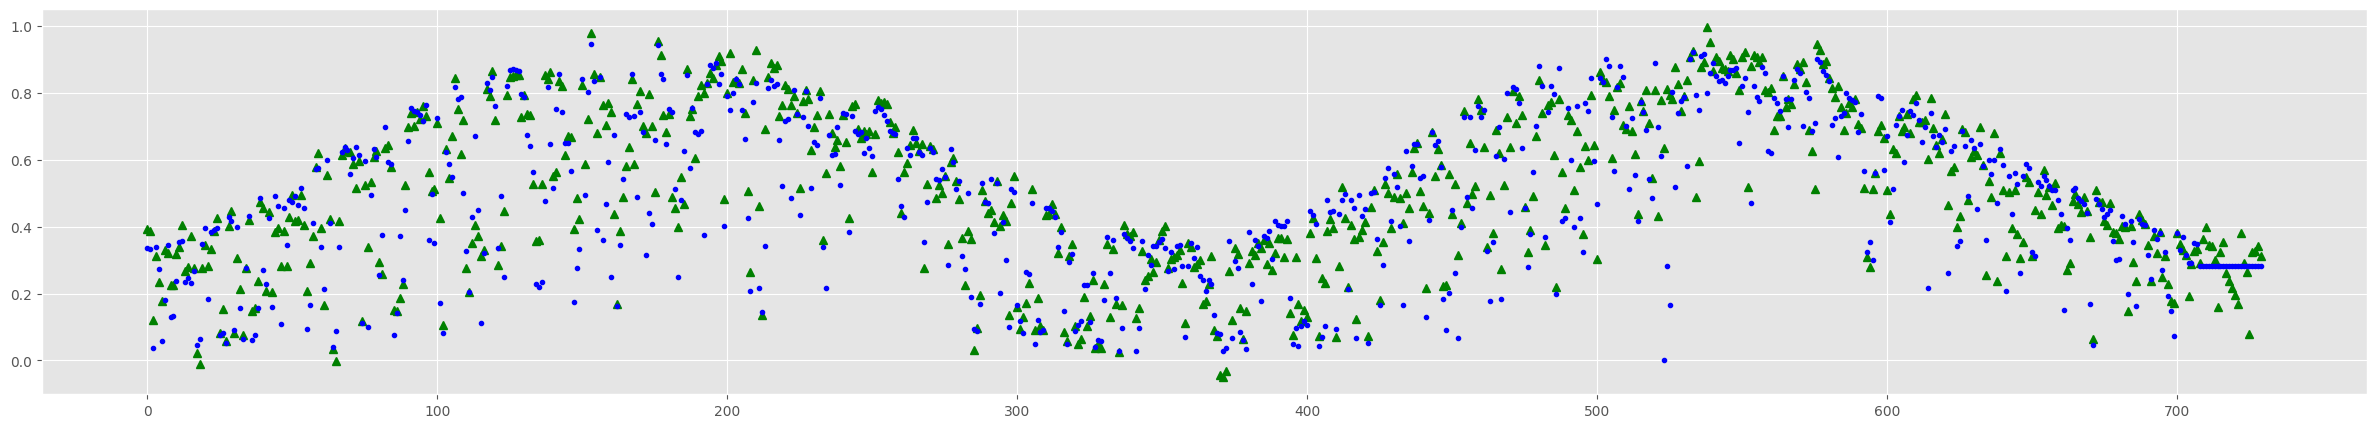

In [8]:
reg_lin = LinearRegression()

np.random.seed(53)
start_time = time.time()
reg_lin.fit(X_train, y_train)
end_time = time.time()

y_pred = reg_lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(reg_lin, 730)


# Regresión lineal evaluada con MAE

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 0.07556975605494036
Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.3359568119049072


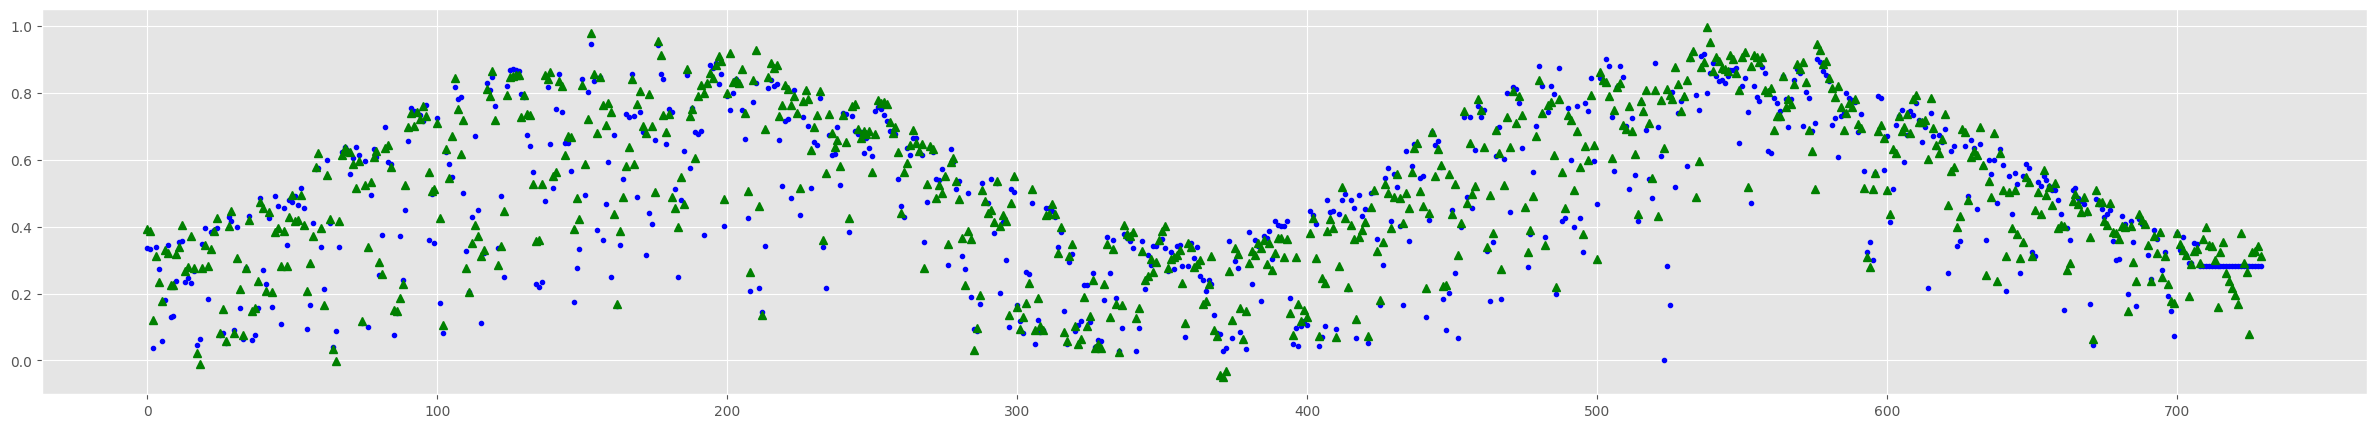

In [81]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=5, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = 1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid_search, 730)

## Regresión lineal evaluada con RMSE

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 0.10596500709365944
Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.32048940658569336


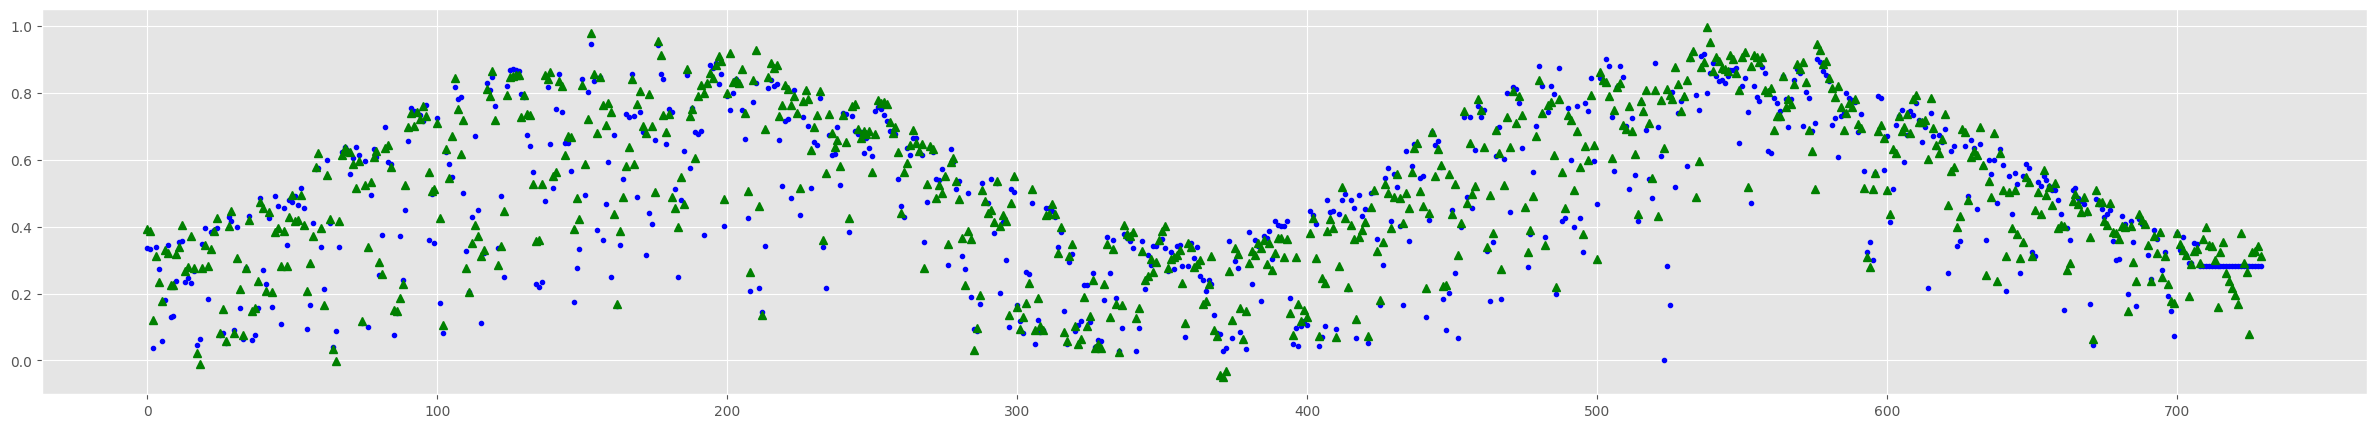

In [82]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=5, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = 1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid_search, 730)

# Minimos cuadrados

Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.32048940658569336


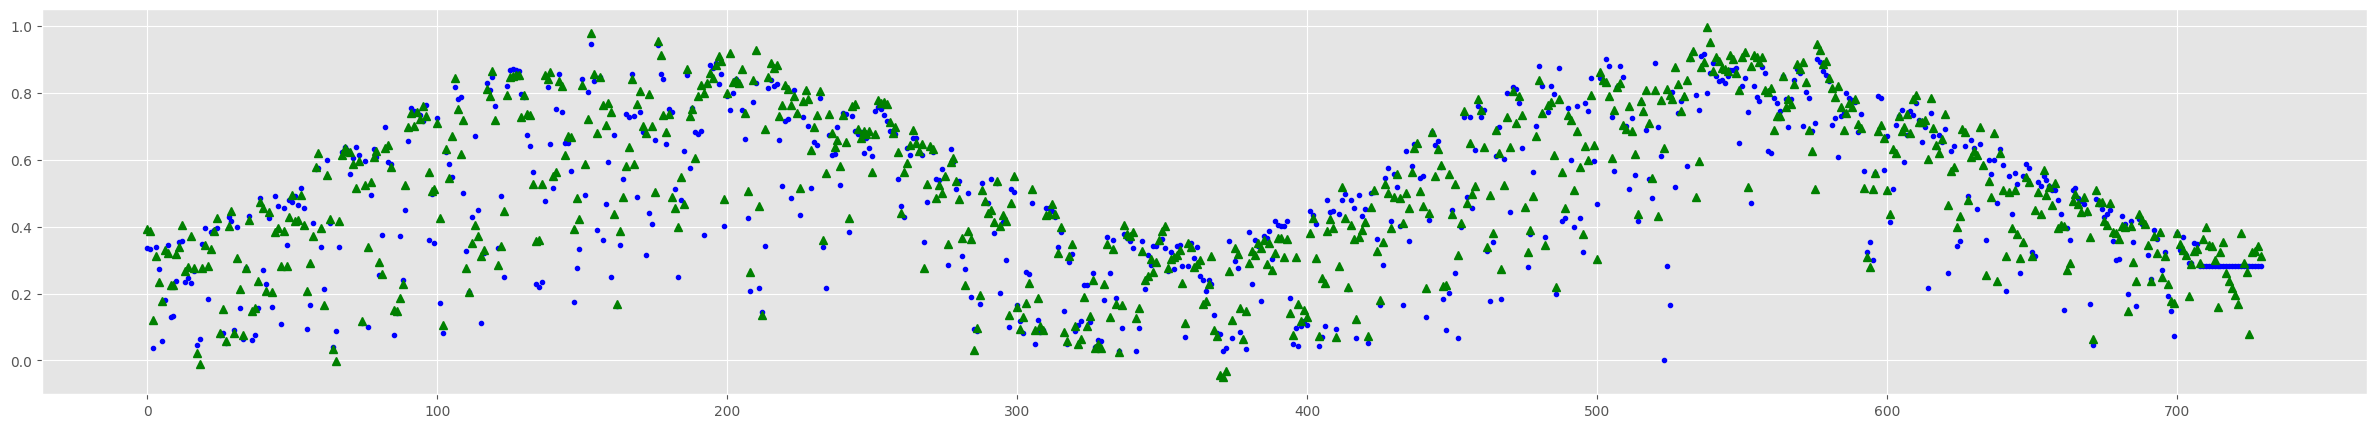

In [83]:
scaler = StandardScaler()
reg_lin = LinearRegression()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('REGL', reg_lin)])

np.random.seed(53)

start_time = time.time()
pipe_regr.fit(X_train, y_train)
end_time = time.time()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(pipe_regr,730)

# Ridge

Error cuadrático medio (MSE): 0.011407095177470222
Raíz cuadrada del error cuadrático medio (RMSE): 0.10680400356480192
Mean Absolute Error (MAE): 0.0704390647349383
Tiempo de entrenamiento: 0.32048940658569336
Mejor alpha encontrado: 0.014481182276745337


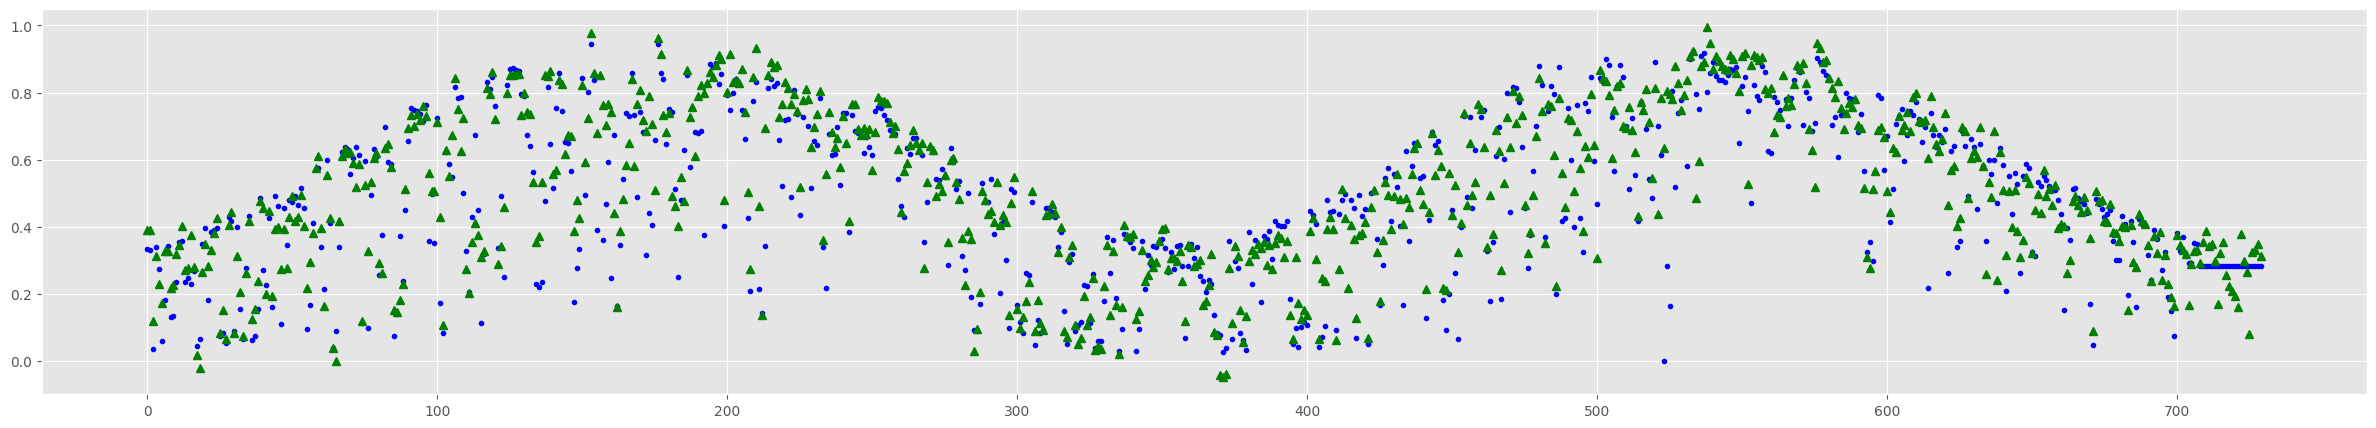

In [84]:
regrRidge = RidgeCV(
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True,
         )

start_time = time.time()
regrRidge.fit(X_train, y_train)
end_time = time.time()

y_pred = regrRidge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrRidge.alpha_

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrRidge, 730)


# Lasso

Error cuadrático medio (MSE): 0.011408897056150759
Raíz cuadrada del error cuadrático medio (RMSE): 0.10681243867710707
Mean Absolute Error (MAE): 0.07072340055188438
Tiempo de entrenamiento: 0.32048940658569336
Mejor alpha encontrado: 1.8041864093920718e-06


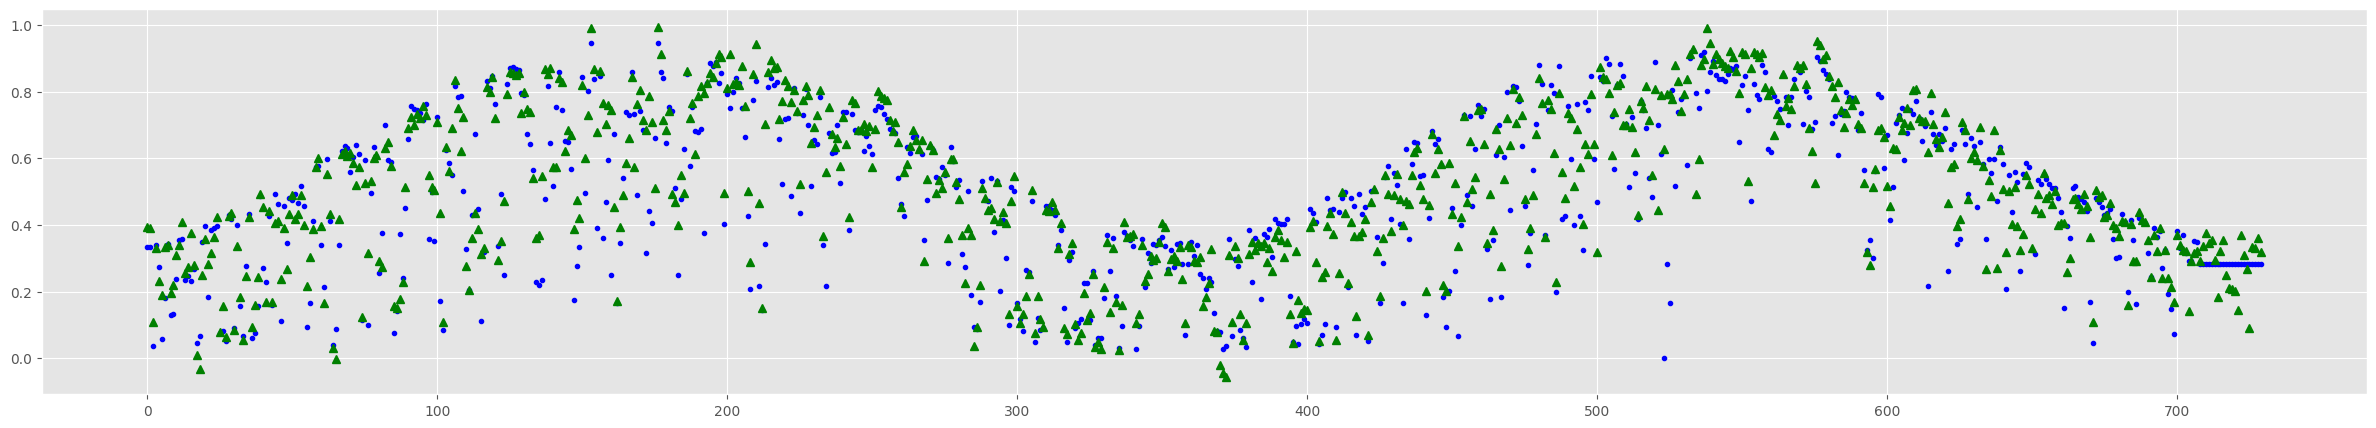

In [85]:
from sklearn.linear_model import LassoCV

regrLasso = LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            cv              = 10
         )

start_time = time.time()
regrLasso.fit(X_train, y_train)
end_time = time.time()

y_pred = regrLasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrLasso.alpha_

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrLasso, 730)

# ElasticNet

Error cuadrático medio (MSE): 0.011409996798856905
Raíz cuadrada del error cuadrático medio (RMSE): 0.10681758656165614
Mean Absolute Error (MAE): 0.07071343501040717
Tiempo de entrenamiento: 0.32048940658569336
Mejor alpha encontrado: 5.872786613189489e-06


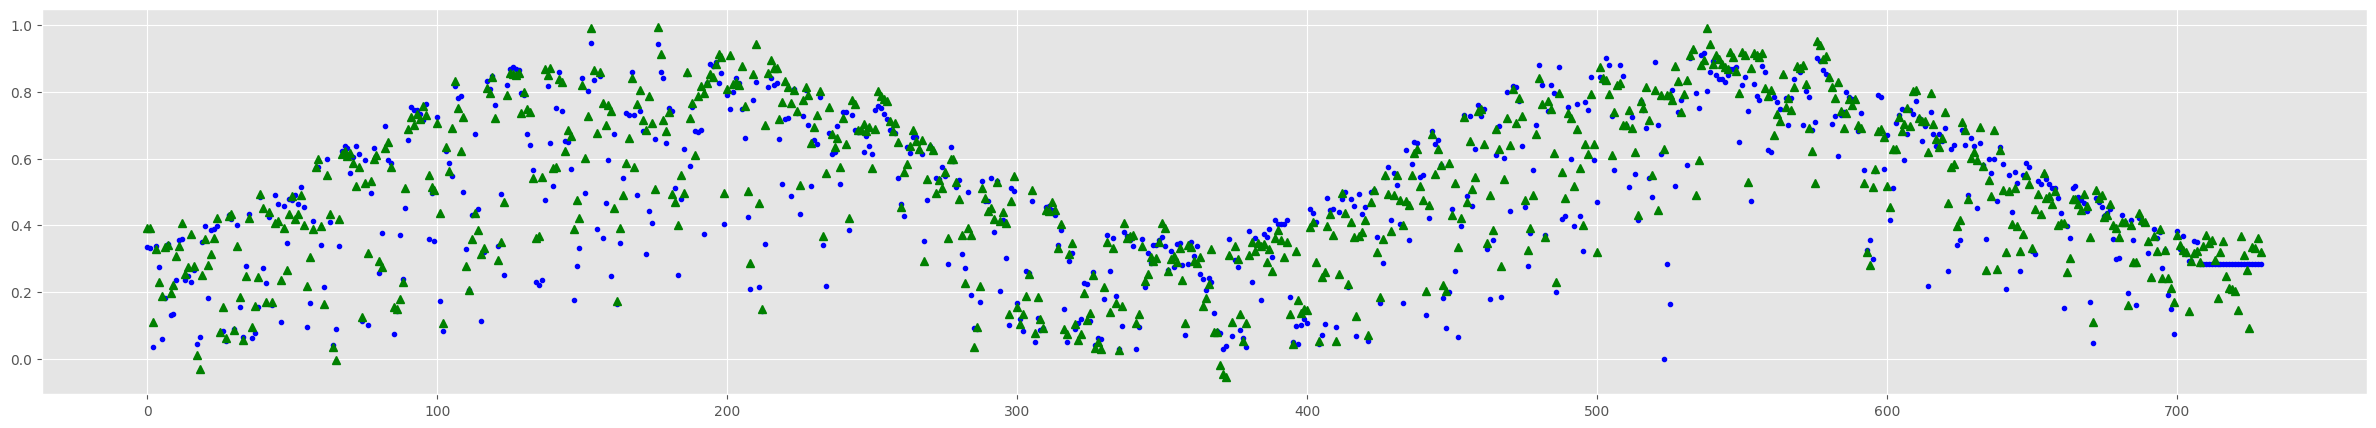

In [86]:
from sklearn.linear_model import ElasticNetCV

regrElastic = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )

start_time = time.time()
regrElastic.fit(X_train, y_train)
end_time = time.time()

y_pred = regrElastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrElastic.alpha_

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrElastic, 730)

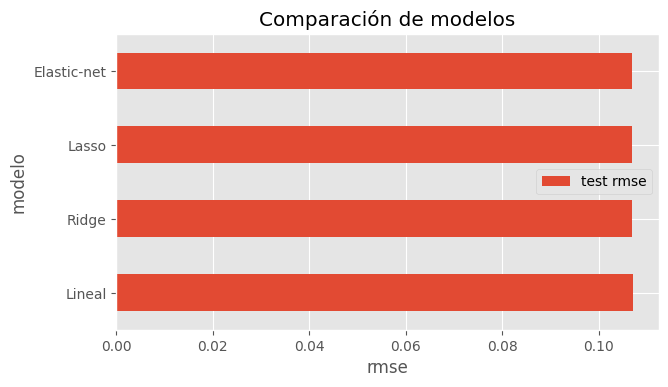

In [87]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_lineal = rmse(y_test, pipe_regr.predict(X=X_test))
rmse_ridge = rmse(y_test, regrRidge.predict(X=X_test))
rmse_lasso = rmse(y_test, regrLasso.predict(X=X_test))
rmse_elastic = rmse(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

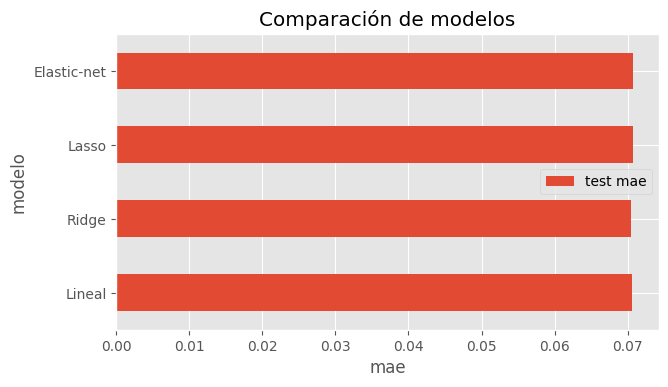

In [88]:
def mae(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return mean_absolute_error(y_test, y_test_pred)

mae_lineal = mae(y_test, pipe_regr.predict(X=X_test))
mae_ridge = mae(y_test, regrRidge.predict(X=X_test))
mae_lasso = mae(y_test, regrLasso.predict(X=X_test))
mae_elastic = mae(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test mae': [mae_lineal, mae_ridge, mae_lasso, mae_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mae')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

# 5) Dimensionalidad del problema

In [34]:
# Calcular la varianza de cada columna
varianzas = df_normalized.var()

# Ordenar las columnas por varianza de menor a mayor
columnas_ordenadas = varianzas.sort_values()

# Mostrar por pantalla todas las variables y su varianza
print(columnas_ordenadas)

umbral = 0.01 # Umbral de varianza mínima permitido

# Filtrar columnas con varianza menor al umbral
columnas_filtradas = varianzas[varianzas >= umbral].index

# Seleccionar solo las columnas con varianza mayor o igual al umbral
df_filtrado = df_normalized[columnas_filtradas]

varianzas2 = df_filtrado.var()

colum_ord = varianzas2.sort_values()

print(colum_ord)

X_train, X_test, y_train, y_test = train_test_split(df_filtrado.iloc[:, :-1], df_filtrado.iloc[:, -1],
                                                    train_size=3650, shuffle=False)

apcp_sf5_1    0.002452
apcp_sf1_1    0.002536
apcp_sf2_1    0.002790
apcp_sf3_1    0.003319
tcolc_e2_1    0.003899
                ...   
spfh_2m2_1    0.065904
dswrf_s3_1    0.067040
uswrf_s2_1    0.070258
dswrf_s2_1    0.086753
uswrf_s1_1    0.114044
Length: 76, dtype: float64
uswrf_s3_1    0.013072
dswrf_s1_1    0.014700
uswrf_s5_1    0.015711
pres_ms3_1    0.016345
pres_ms4_1    0.016875
pres_ms5_1    0.017224
pres_ms2_1    0.017709
pres_ms1_1    0.018003
tmp_sfc3_1    0.031954
ulwrf_t1_1    0.032469
tmin_2m5_1    0.033360
tmax_2m1_1    0.033367
tmp_sfc1_1    0.033881
ulwrf_t4_1    0.034292
tmin_2m1_1    0.034540
tmp_sfc5_1    0.034581
tmp_2m_1_1    0.034683
tmin_2m2_1    0.034735
tmin_2m3_1    0.034770
ulwrf_s1_1    0.035559
tmp_2m_5_1    0.035874
ulwrf_t5_1    0.035933
ulwrf_t3_1    0.036324
tmp_sfc4_1    0.036549
ulwrf_s4_1    0.036689
ulwrf_t2_1    0.036738
tmax_2m3_1    0.037082
tmax_2m5_1    0.037278
tmp_2m_4_1    0.037294
tmax_2m4_1    0.037320
tmp_2m_3_1    0.037416
tmp_sfc

# 6) Métodos avanzados

## SVR

In [5]:
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [7]:
# Creamos el modelo SVM lineal y lo ajustamos a los datos de entrenamiento
svm = SVR()

np.random.seed(53)
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

# Realizamos predicciones sobre los datos de prueba
y_pred = svm.predict(X_test)

# Calculamos la precisión del modelo
r2 = r2_score(y_test, y_pred)

tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.8123557455934419
Tiempo de entrenamiento: 0.15256404876708984


# SVR evaluado con MAE

In [8]:
svr = SVR()

# Definir grilla de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Realizar búsqueda de hiperparámetros
hpo_regr = GridSearchCV(svr, 
                        param_grid, 
                        scoring='neg_mean_absolute_error', 
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

np.random.seed(53)
start_time = time.time()
hpo_regr.fit(X_train, y_train)
end_time = time.time()

y_pred = hpo_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', hpo_regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 10000, 'gamma': 0.001}
Coeficiente de determinación del modelo: 0.8105511471394891
Error cuadrático medio (MSE): 0.010957858883741824
Raíz cuadrada del error cuadrático medio (RMSE): 0.1046797921460576
Mean Absolute Error (MAE): 0.07027560453987645
Tiempo de entrenamiento: 24.36042857170105


# SVR evaluado con RMSE

In [9]:
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}



# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(svr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

np.random.seed(53)
start_time = time.time()
hpo_regr.fit(X_train, y_train)
end_time = time.time()

y_pred = hpo_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', hpo_regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 1, 'gamma': 0.1}
Coeficiente de determinación del modelo: 0.8116582788147526
Error cuadrático medio (MSE): 0.010893821585652764
Raíz cuadrada del error cuadrático medio (RMSE): 0.10437347165660806
Mean Absolute Error (MAE): 0.07024640859549804
Tiempo de entrenamiento: 21.234100341796875


## Random forests

In [44]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [59]:
regr_rf = RandomForestRegressor()
np.random.seed(53)
start_time = time.time()
regr_rf.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


Coeficiente de determinación del modelo: 0.797108373281225
Error cuadrático medio (MSE): 0.011735398661474704
Raíz cuadrada del error cuadrático medio (RMSE): 0.10833004505433709
Mean Absolute Error (MAE): 0.07002872579159453
Tiempo de entrenamiento: 4.950946807861328


# Random forest evaluado con MAE

## Optimización de parámetros: n_estimators

Valor óptimo de n_estimators: 141


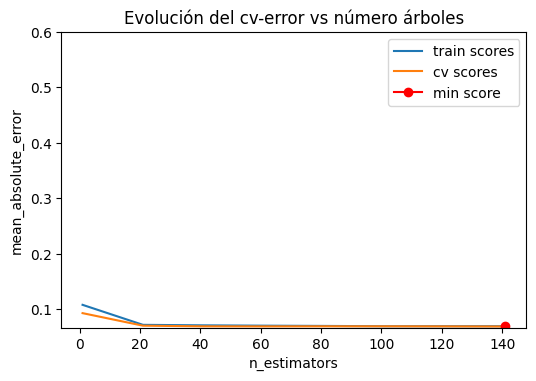

In [42]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(mean_absolute_error(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_mean_absolute_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_absolute_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([None,0.6])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

## Optimización de parámetros: max_features

Valor óptimo de max_features: 10


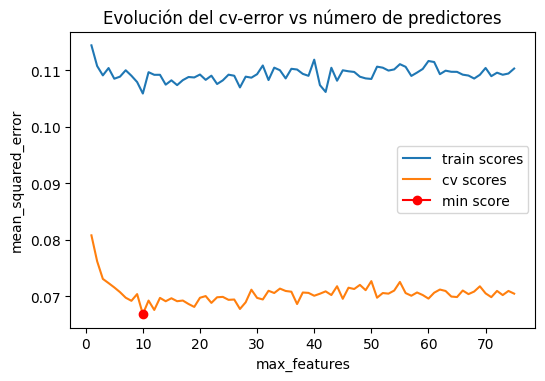

In [45]:
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_mean_absolute_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [49]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,76)}


regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=ps,
                         n_jobs=-1, 
                         verbose=1
                        )

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


TypeError: Parameter grid for parameter 'n_estimators' needs to be a list or a numpy array, but got <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CBCDB3AC50> (of type rv_discrete_frozen) instead. Single values need to be wrapped in a list with one element.

# Random forest evaluado con RMSE

## Optimización de parámetros: n_estimators

Mean absolute error (MAE):  [0.15695840790200685, 0.11025751414578484, 0.10950754019737863, 0.10887793565524674, 0.10834645084244297, 0.10758826028576376, 0.10764079275269198, 0.10764685772356505]
Valor óptimo de n_estimators: 141


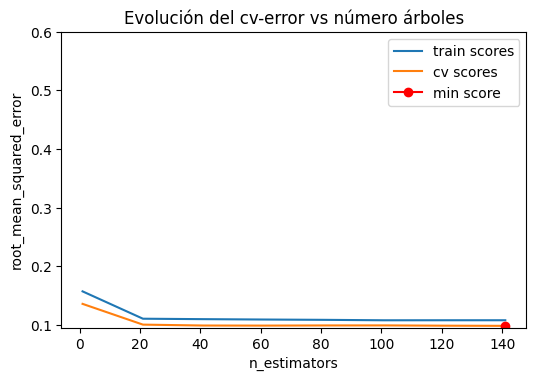

In [ ]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

print("Mean absolute error (MAE): ", train_scores)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([None,0.6])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

## Optimización de parámetros: max_features

Valor óptimo de max_features: 10


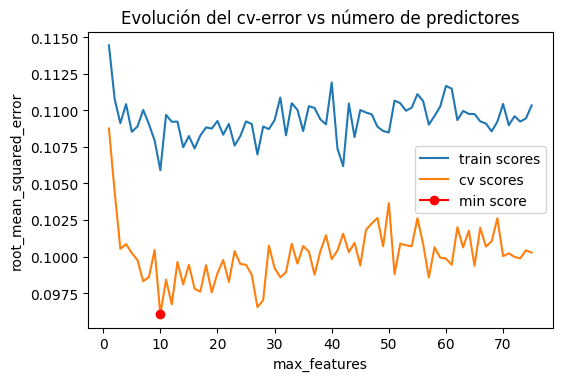

In [ ]:
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [64]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,76)}


regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=ps,
                         n_jobs=-1, 
                         verbose=1
                        )

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_features': 10, 'n_estimators': 68}
Coeficiente de determinación del modelo: 0.8028882195242412
Error cuadrático medio (MSE): 0.011401088167933058
Raíz cuadrada del error cuadrático medio (RMSE): 0.10677587821194943
Mean Absolute Error (MAE): 0.06846593598643454
Tiempo de entrenamiento: 42.906174182891846


## Gradient boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import multiprocessing

# Para dibujar las predicciones y los valores reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();

Coeficiente de determinación del modelo: 0.7937615273691206
Error cuadrático medio (MSE): 0.011928982653442556
Raíz cuadrada del error cuadrático medio (RMSE): 0.10921988213435573
Mean Absolute Error (MAE): 0.07150572656838797
Tiempo de entrenamiento: 1.5222740173339844


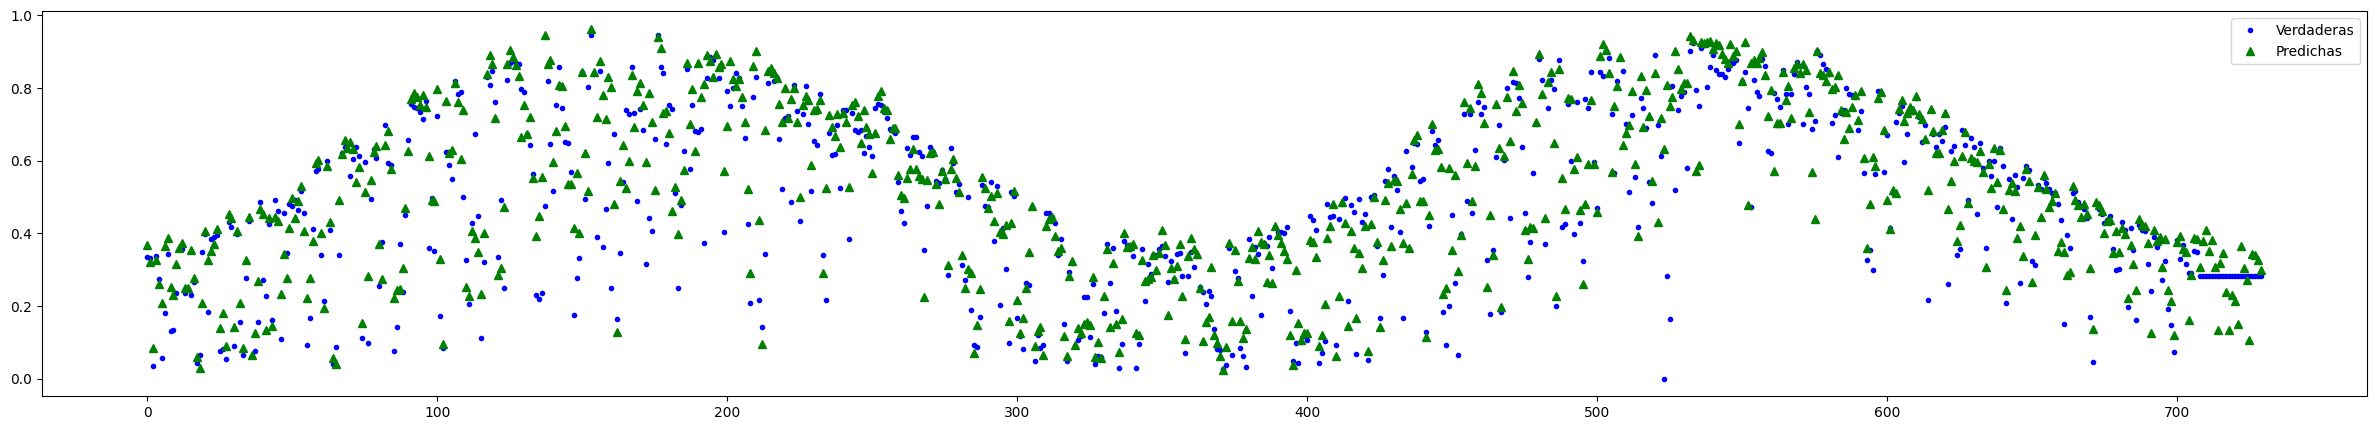

In [ ]:
regr_gb = HistGradientBoostingRegressor()

np.random.seed(53)
start_time = time.time()
regr_gb.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr_gb, 730)

# Gradient boosting evaluado con MAE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'max_depth': 1, 'learning_rate': 0.2, 'l2_regularization': 1}
Coeficiente de determinación del modelo: 0.8013285748243586
Error cuadrático medio (MSE): 0.011491299147160636
Raíz cuadrada del error cuadrático medio (RMSE): 0.10719747733580598
Mean Absolute Error (MAE): 0.06978635916771504
Tiempo de entrenamiento: 16.69036602973938


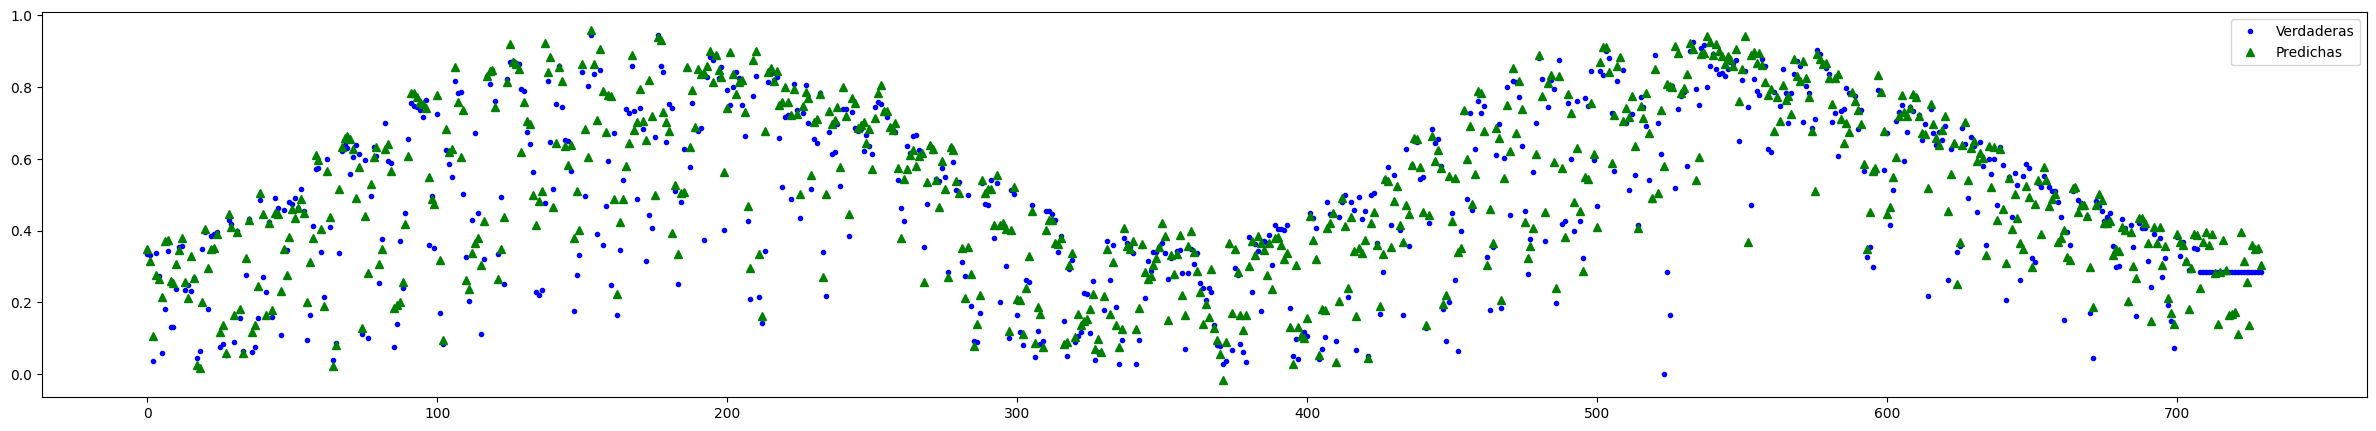

In [73]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }


regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 53,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=ps,
                           n_jobs=-1,
                           verbose=1)

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr, 730)

# Gradient boosting evaluado con RMSE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'max_depth': 1, 'learning_rate': 0.1, 'l2_regularization': 1}
Coeficiente de determinación del modelo: 0.8057985499148734
Error cuadrático medio (MSE): 0.011232752549933325
Raíz cuadrada del error cuadrático medio (RMSE): 0.10598468073232718
Mean Absolute Error (MAE): 0.06883148286984242
Tiempo de entrenamiento: 19.637439966201782


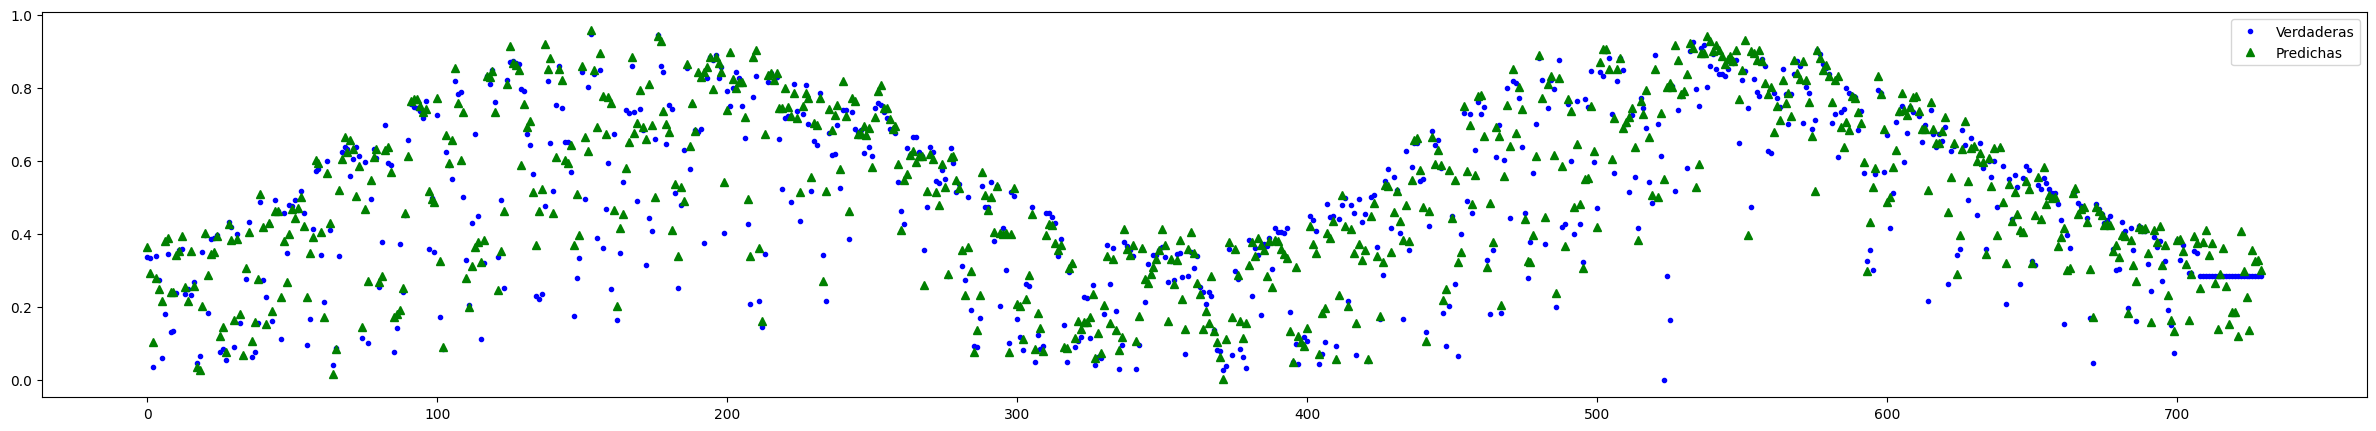

In [74]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }


regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 53,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=ps,
                           n_jobs=-1,
                           verbose=1)

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr, 730)